# 线性SVM

In [47]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 数据生成
centers = [(-1, -0.125), (0.5, 0.5)]
X, y = make_blobs(n_samples=50, n_features=2, centers=centers, cluster_std=0.3)
print(set(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearSVC() 
model.fit(X_train, y_train) # 训练
y_pred = model.predict(X_test) 
accuracy_score(y_pred, y_test) # 评估


{0, 1}


1.0

## 数据分类plot

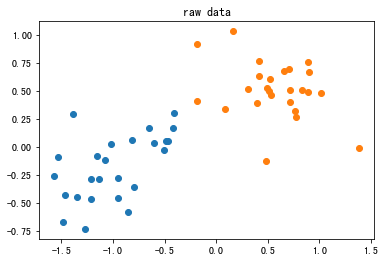

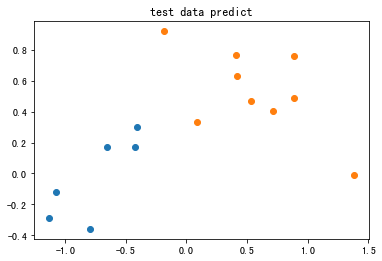

In [48]:
import matplotlib.pyplot as plt

for clusterLabel in set(y):
    plt.scatter(X[np.where(y==clusterLabel)][:,0], X[np.where(y==clusterLabel)][:,1])
plt.title("raw data")
plt.show()

for clusterLabel in set(y_pred):
    plt.scatter(X_test[np.where(y_pred==clusterLabel)][:,0], X_test[np.where(y_pred==clusterLabel)][:,1])
plt.title("test data predict")
plt.show()

## 支持向量与决策边界
[点到平面距离_百度百科](https://baike.baidu.com/item/%E7%82%B9%E5%88%B0%E5%B9%B3%E9%9D%A2%E8%B7%9D%E7%A6%BB/10690055?fr=aladdin)

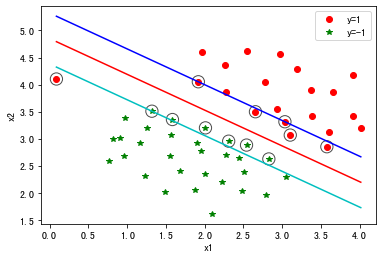

In [67]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from sklearn import svm
datafile = '../resource/lawLite19/SVM/data1.mat'   

# https://www.jianshu.com/p/4cee48cba990
# https://www.cnblogs.com/yymn/p/4589220.html
def plot_linearBoundary(X,y,model):
    class1 = np.where(y==1)
    class0 = np.where(y==0)
    # ravel() https://www.cjavapy.com/article/870/
    plt.plot(X[class1,0].ravel(),X[class1,1].ravel(),'ro')
    plt.plot(X[class0,0].ravel(),X[class0,1].ravel(),'g*')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(['y=1','y=-1'])

    w = model.coef_
    b = model.intercept_
    x1p = np.linspace(min(X[:,0]),max(X[:,0]),100)
    x2p = -(w[0,0]*x1p+b)/w[0,1]
    bDelta = 1/w[0,1]
    plt.plot(x1p,x2p,'r')
    plt.plot(x1p,x2p+bDelta,'b')
    plt.plot(x1p,x2p-bDelta,'c')

    sv = model.support_vectors_
    plt.scatter(sv[:,0],sv[:,1],s=150,c='none',alpha=0.7,edgecolor='black')
    plt.show()


data = spio.loadmat(datafile)
X = data['X']
y = data['y'].ravel()

svm_linear = svm.SVC(C=1.0,kernel='linear').fit(X,y)
plot_linearBoundary(X,y,svm_linear)